# 🤝 How Kaggle Brought the World Together to Learn, Compete, and Advance AI

## Introduction

Over the past 15 years, Kaggle has evolved from a niche machine learning competition platform into a thriving global community of data scientists, AI researchers, and machine learning engineers. This community has not only solved thousands of real-world problems through competitions but has also contributed significantly to the evolution of AI practices, from traditional machine learning to state-of-the-art deep learning and foundation models.

With the rise of competitions, datasets, kernels (now called code), and forums, Kaggle has provided a public window into how the AI and machine learning landscape has transformed over time. Through the Meta Kaggle datasets, we can analyze this evolution and better understand how Kaggle has shaped — and continues to shape — the AI community.

## Objective

The objective of this project is to leverage the Meta Kaggle datasets to explore and visualize Kaggle’s role in advancing AI over the past decade and a half. Specifically, this analysis aims to:

- Examine how Kaggle competitions have evolved from classic machine learning to deep learning and AI-focused challenges.
- Analyze user growth, engagement trends, and how community behaviors shifted over time.
- Investigate the progression of models, kernels, and datasets and how they reflect broader industry trends.
- Highlight how forums and discussions reflect the changing priorities, interests, and technical maturity of the AI community.
- Provide data-driven insights into how Kaggle has helped push the boundaries of AI through its ecosystem.

Ultimately, this work aims to tell the story of Kaggle’s impact on AI — not just through competitions, but through community-driven collaboration, knowledge sharing, and innovation.

## 📈 User Growth: How Kaggle United the World in the AI Revolution

### Exploring User Registrations Over Time
One of the clearest indicators of Kaggle’s impact on the global AI community is its exponential user growth over the years. By analyzing user registration trends, we can observe how Kaggle attracted a broader audience as AI gained prominence worldwide.

### We explore:
- Growth trends in total users over the years.
- Spikes correlating with key AI milestones (e.g., the rise of deep learning, ChatGPT era, etc.).
- Geographic diversity based on user countries.

### Data Sources:
- `Users.csv`: Registration date, country, and performance tier
- `UserOrganizations.csv`: Association with organizations, potentially indicating enterprise adoption
- `UserFollowers.csv`: Community engagement and influence metrics

### Key Questions:
- How has the number of users grown since Kaggle’s inception?
- Are there identifiable periods where growth accelerated due to industry trends?
- How has Kaggle’s reach expanded geographically?
- How does user growth reflect the broader shift from ML to AI?

### 📊 Visualizations:
- Line chart: New users per year
- Cumulative user growth curve
- World map heatmap: User distribution by country
- Engagement growth through followers network over time

### Load Required Libraries & Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/meta-kaggle")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/meta-kaggle


In [3]:
!pip install geopandas plotly --quiet
!pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 75.8 MB/s eta 0:00:00:00:0100:01


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import pandas as pd

In [4]:
# Load datasets
user_achievements = pd.read_csv('/kaggle/input/meta-kaggle/UserAchievements.csv')
user_followers = pd.read_csv('/kaggle/input/meta-kaggle/UserFollowers.csv')
user_organizations = pd.read_csv('/kaggle/input/meta-kaggle/UserOrganizations.csv')
users = pd.read_csv('/kaggle/input/meta-kaggle/Users.csv')
teams = pd.read_csv('/kaggle/input/meta-kaggle/Teams.csv')
team_memberships = pd.read_csv('/kaggle/input/meta-kaggle/TeamMemberships.csv')

# Convert dates to datetime
users['RegisterDate'] = pd.to_datetime(users['RegisterDate'], errors='coerce')
user_followers['CreationDate'] = pd.to_datetime(user_followers['CreationDate'], errors='coerce')

### Analyze User Registrations Over Time

In [5]:
# Extract year from RegisterDate
users['Year'] = users['RegisterDate'].dt.year

# Count users by year
user_growth = users.groupby('Year')['Id'].count().reset_index()
user_growth.columns = ['Year', 'New Users']

# Calculate % Growth
user_growth['% Growth'] = user_growth['New Users'].pct_change() * 100


In [29]:
len(users)

25166512

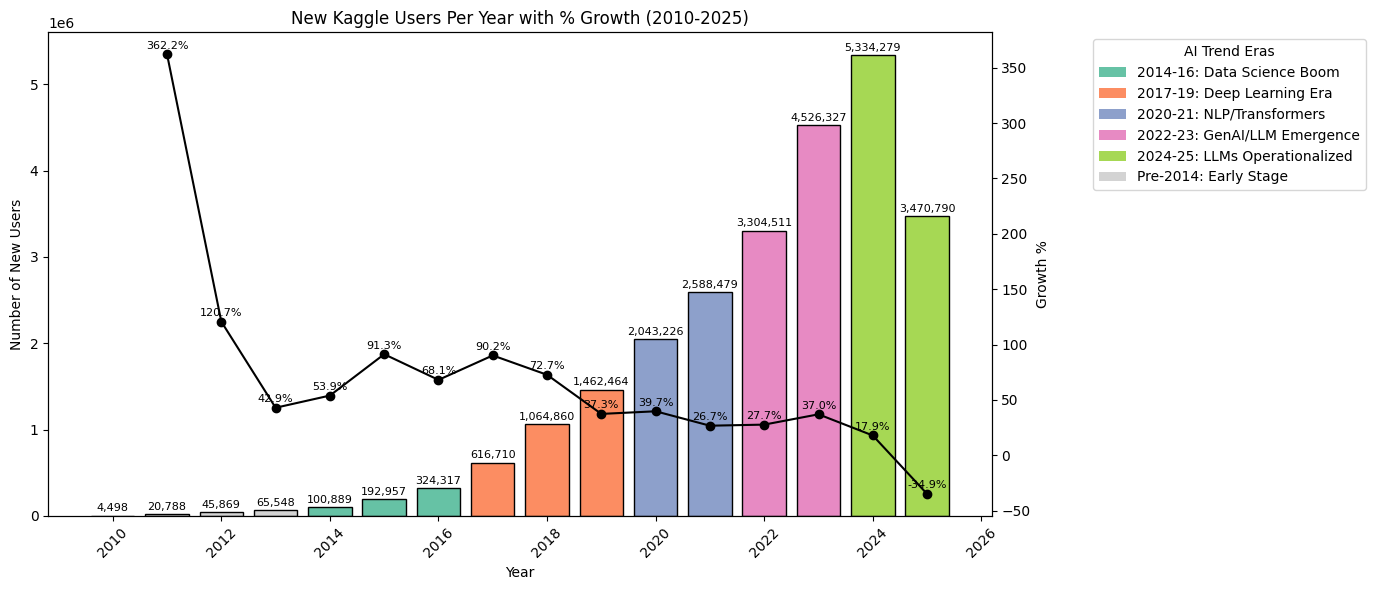

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Patch

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))
bars = ax1.bar(years, user_growth['New Users'], color=colors, edgecolor='black')

ax1.set_ylabel('Number of New Users')
ax1.set_xlabel('Year')
ax1.set_title('New Kaggle Users Per Year with % Growth (2010-2025)')
ax1.tick_params(axis='x', rotation=45)

# % Growth Line
ax2 = ax1.twinx()
ax2.plot(years, user_growth['% Growth'], color='black', marker='o')
ax2.set_ylabel('Growth %')

# Annotate New Users on Bars
for bar, value in zip(bars, user_growth['New Users']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 50000, f"{int(value):,}", ha='center', fontsize=8)

# Annotate % Growth
for x, y in zip(years, user_growth['% Growth']):
    if not pd.isnull(y):
        ax2.text(x, y + 5, f"{y:.1f}%", ha='center', color='black', fontsize=8)

# Legend outside the plot cleanly
legend_elements = [
    Patch(facecolor='#66c2a5', label='2014-16: Data Science Boom'),
    Patch(facecolor='#fc8d62', label='2017-19: Deep Learning Era'),
    Patch(facecolor='#8da0cb', label='2020-21: NLP/Transformers'),
    Patch(facecolor='#e78ac3', label='2022-23: GenAI/LLM Emergence'),
    Patch(facecolor='#a6d854', label='2024-25: LLMs Operationalized'),
    Patch(facecolor='lightgrey', label='Pre-2014: Early Stage'),
]

ax1.legend(handles=legend_elements, title='AI Trend Eras', bbox_to_anchor=(1.1, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
import pycountry_convert as pc

# Map countries to continents (requires clean country names)
def country_to_continent(country):
    try:
        country_code = pc.country_name_to_country_alpha2(country)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return 'Unknown'

users['Continent'] = users['Country'].apply(lambda x: country_to_continent(x) if pd.notnull(x) else 'Unknown')

# Year and Continent-wise count
users['Year'] = users['RegisterDate'].dt.year
user_continent_growth = users.groupby(['Year', 'Continent']).size().unstack(fill_value=0)
# Remove 'Unknown' from columns if it exists
if 'Unknown' in user_continent_growth.columns:
    user_continent_growth = user_continent_growth.drop(columns=['Unknown'])
# Cumulative sum per continent
user_continent_growth_cumsum = user_continent_growth.cumsum()


/tmp/ipykernel_36/1781894456.py:27: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.



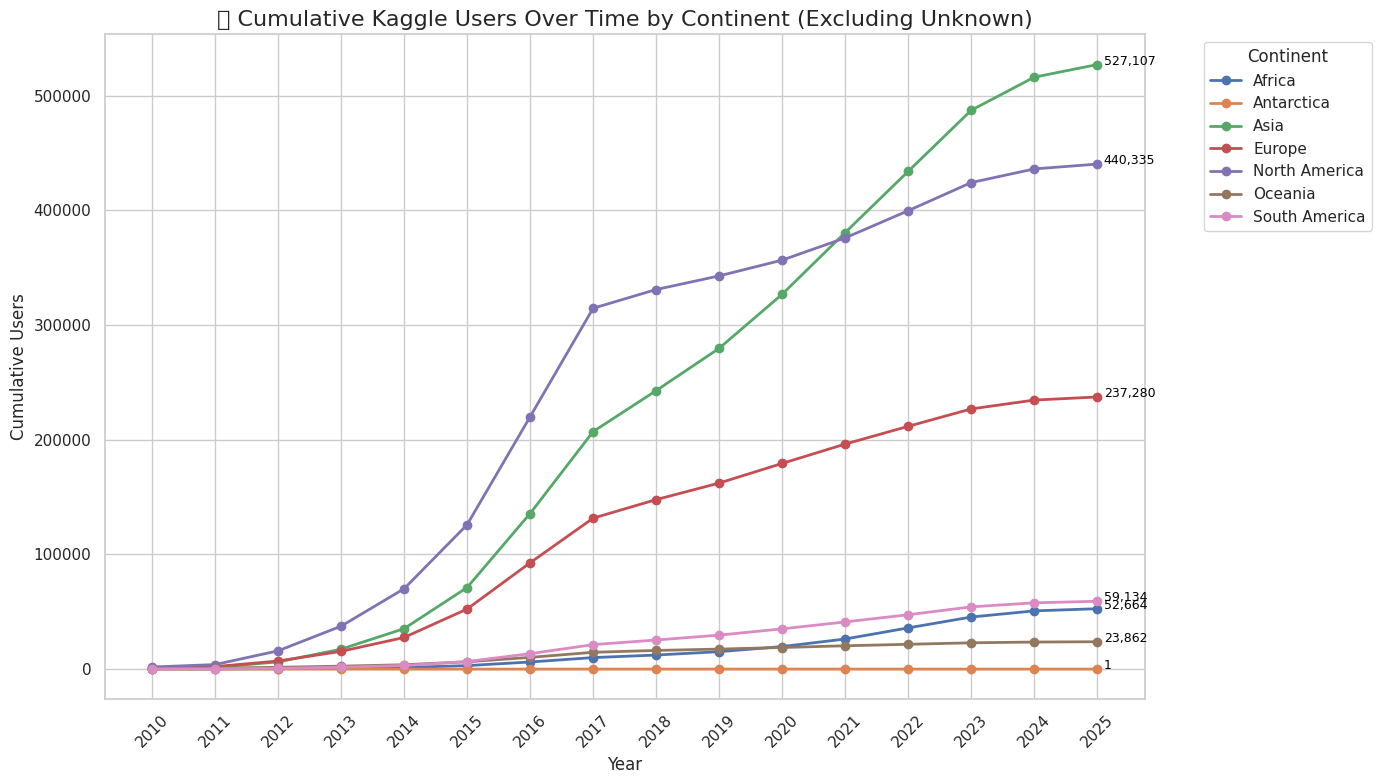

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure a clean style
sns.set_theme(style='whitegrid')

# Plot
plt.figure(figsize=(14, 8))

# Plot each continent
for continent in user_continent_growth_cumsum.columns:
    plt.plot(user_continent_growth_cumsum.index,
             user_continent_growth_cumsum[continent],
             marker='o', linewidth=2, label=continent)

    # Add text labels for the last point only
    last_year = user_continent_growth_cumsum.index[-1]
    last_value = user_continent_growth_cumsum[continent].iloc[-1]
    plt.text(last_year + 0.1, last_value, f"{int(last_value):,}", fontsize=9, color='black')

# Aesthetics
plt.title('🌍 Cumulative Kaggle Users Over Time by Continent (Excluding Unknown)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Cumulative Users')
plt.xticks(user_continent_growth_cumsum.index, rotation=45)
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

/tmp/ipykernel_36/992158035.py:13: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



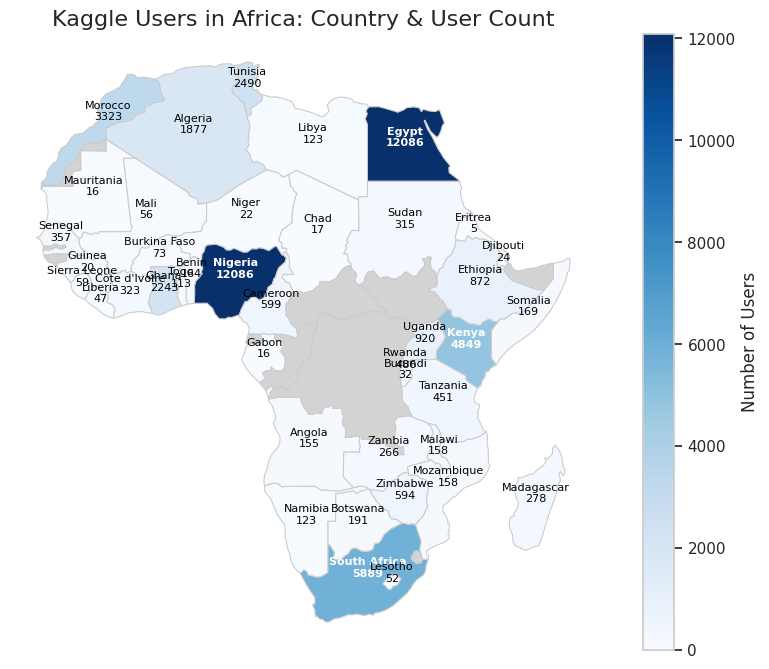

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Prepare user counts per country
country_users = users['Country'].value_counts().reset_index()
country_users.columns = ['Country', 'UserCount']

# Top 4 countries by user count in Africa (hardcoded based on your info)
highlight_countries = ['Egypt', 'Nigeria', 'Kenya', 'South Africa']

# Load Africa map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world[world['continent'] == 'Africa']

# Merge Kaggle users data with Africa map
merged_africa = africa.merge(country_users, how='left', left_on='name', right_on='Country')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
merged_africa.plot(
    column='UserCount',
    cmap='Blues',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    missing_kwds={"color": "lightgrey"}
)

# Annotate with **Country Name** and **User Count**
for idx, row in merged_africa.iterrows():
    if pd.notnull(row['UserCount']):
        label = f"{row['name']}\n{int(row['UserCount'])}"
        color = 'white' if row['name'] in highlight_countries else 'black'
        plt.annotate(
            text=label,
            xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
            ha='center',
            fontsize=8,
            color=color,
            weight='bold' if row['name'] in highlight_countries else 'normal'
        )

# Titles and aesthetics
ax.set_title('Kaggle Users in Africa: Country & User Count', fontsize=16)
ax.set_axis_off()

# Colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=merged_africa['UserCount'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Users')

plt.show()

### Number of Teams Formed per Year

In [11]:
teams.iloc[0]

Id                                                  882
CompetitionId                                      2447
TeamLeaderId                                      747.0
TeamName                          the_kasparov_of_stats
ScoreFirstSubmittedDate                             NaN
LastSubmissionDate                           08/18/2010
PublicLeaderboardSubmissionId                    4721.0
PrivateLeaderboardSubmissionId                   4721.0
IsBenchmark                                       False
Medal                                               NaN
MedalAwardDate                               09/06/2018
PublicLeaderboardRank                             223.0
PrivateLeaderboardRank                            212.0
WriteUpForumTopicId                                 NaN
Name: 0, dtype: object

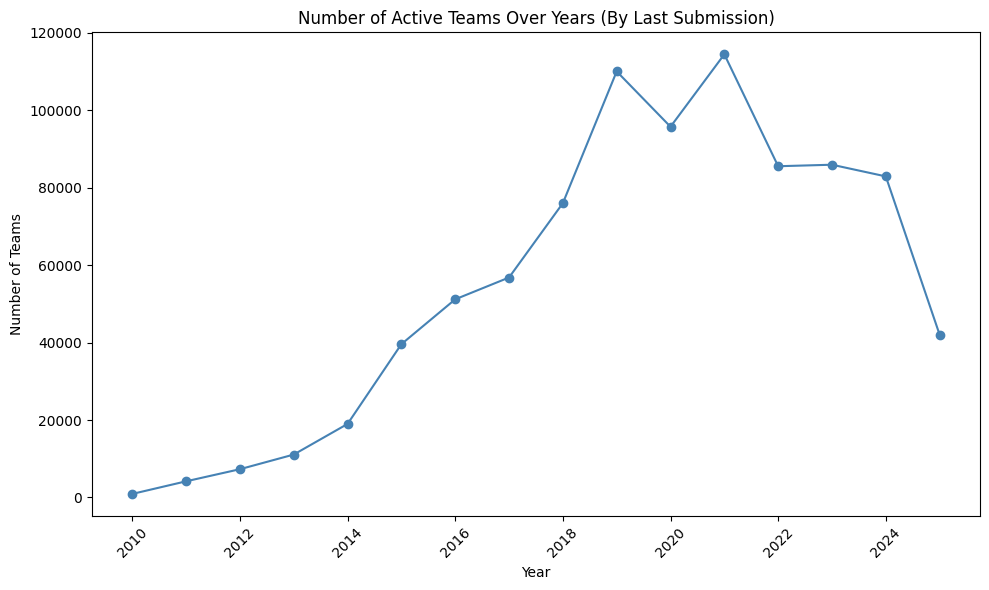

In [12]:
teams['LastSubmissionDate'] = pd.to_datetime(teams['LastSubmissionDate'], errors='coerce')
teams['Year'] = teams['LastSubmissionDate'].dt.year

teams_per_year = teams.groupby('Year').size()

# Plot
plt.figure(figsize=(10, 6))
teams_per_year.plot(marker='o', color='steelblue')
plt.title('Number of Active Teams Over Years (By Last Submission)')
plt.ylabel('Number of Teams')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

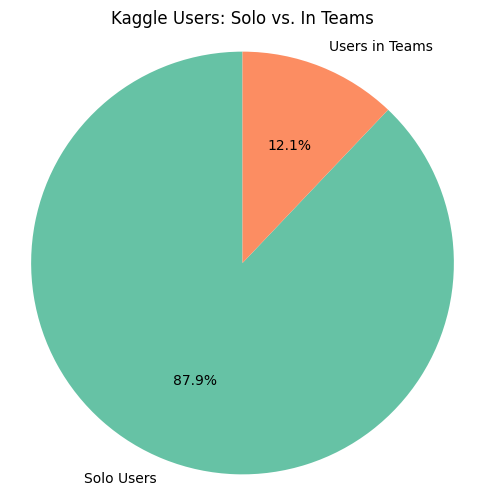

In [13]:
users_in_teams = team_memberships['UserId'].nunique()
total_users = users['Id'].nunique()
solo_users = total_users - users_in_teams

labels = ['Solo Users', 'Users in Teams']
sizes = [solo_users, users_in_teams]
colors = ['#66c2a5', '#fc8d62']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Kaggle Users: Solo vs. In Teams')
plt.axis('equal')
plt.show()

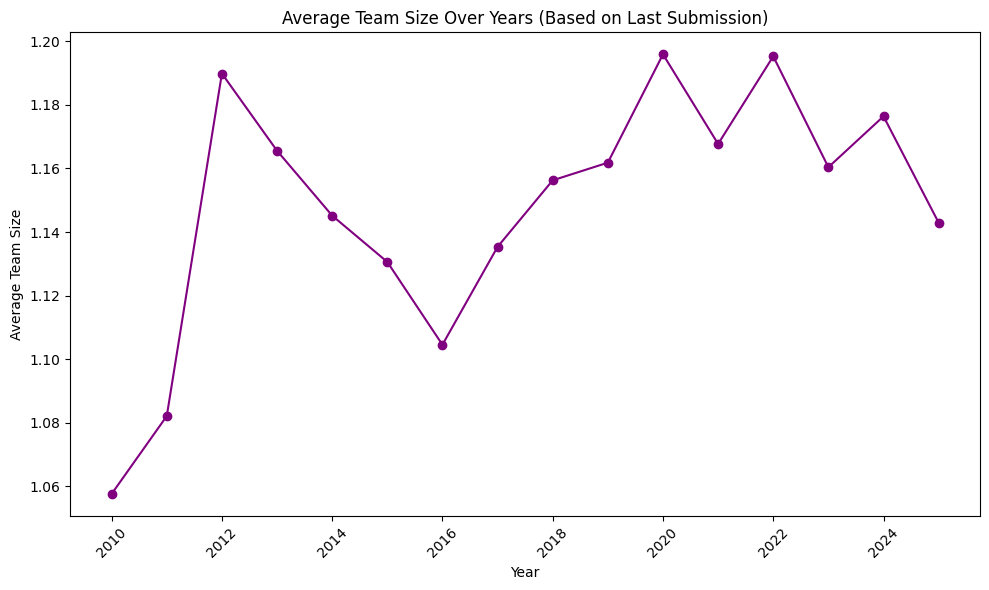

In [14]:
team_sizes = team_memberships.groupby('TeamId')['UserId'].count().reset_index(name='TeamSize')
teams_with_size = teams.merge(team_sizes, left_on='Id', right_on='TeamId', how='left')
teams_with_size['Year'] = pd.to_datetime(teams_with_size['LastSubmissionDate'], errors='coerce').dt.year

avg_team_size = teams_with_size.groupby('Year')['TeamSize'].mean()

plt.figure(figsize=(10, 6))
avg_team_size.plot(marker='o', color='purple')
plt.title('Average Team Size Over Years (Based on Last Submission)')
plt.ylabel('Average Team Size')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Join teams with team_memberships
# Merge teams and team_memberships
team_data = team_memberships.merge(teams, left_on='TeamId', right_on='Id', how='left')

# Count number of members per team
team_sizes = team_data.groupby('TeamId')['UserId'].nunique().reset_index(name='TeamSize')

# Merge back to teams to retain submission dates, medals, ranks, etc.
teams = teams.merge(team_sizes, left_on='Id', right_on='TeamId', how='left')

# Extract year from LastSubmissionDate
teams['Year'] = pd.to_datetime(teams['LastSubmissionDate'], errors='coerce').dt.year

/tmp/ipykernel_36/3791093484.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



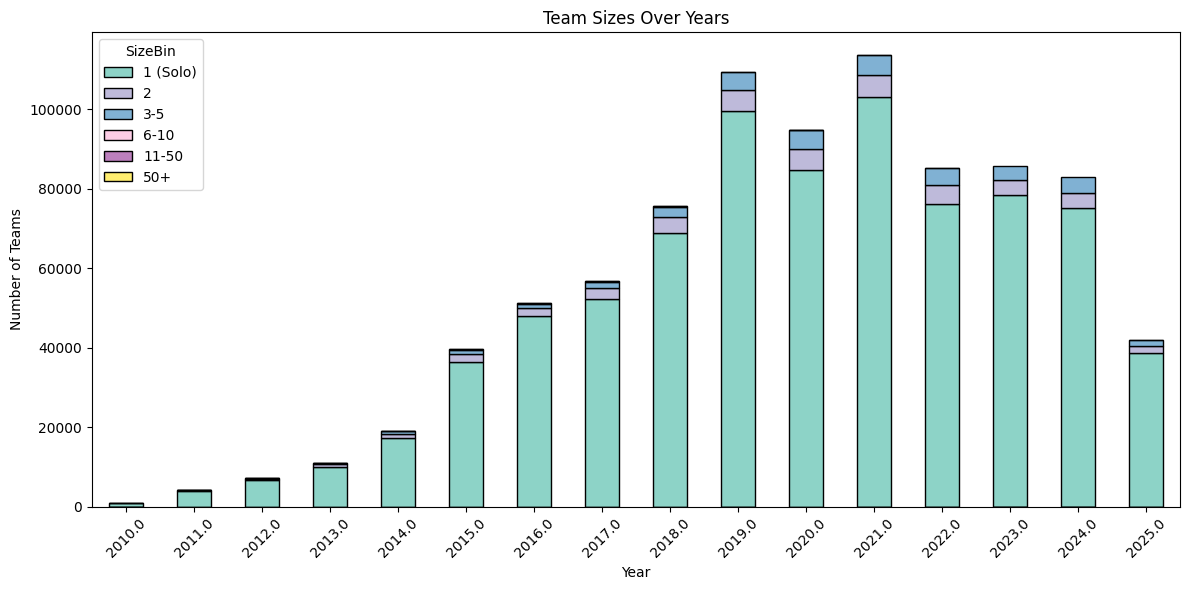

In [16]:
# Bin teams by size
bins = [0, 1, 2, 5, 10, 50, 100]
labels = ['1 (Solo)', '2', '3-5', '6-10', '11-50', '50+']
teams['SizeBin'] = pd.cut(teams['TeamSize'], bins=bins, labels=labels, right=True)

# Count per year, per size bin
size_year = teams.groupby(['Year', 'SizeBin']).size().unstack(fill_value=0)

# Plot
size_year.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black', colormap='Set3')
plt.title('Team Sizes Over Years')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/2152782577.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



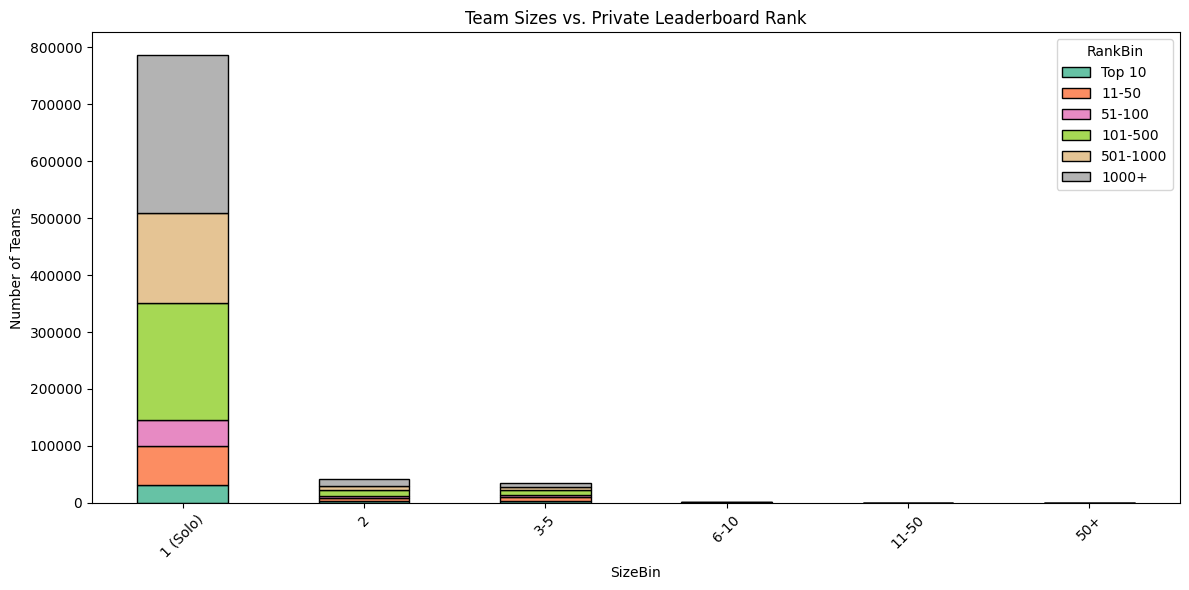

In [17]:
# Bin leaderboard ranks
rank_bins = [0, 10, 50, 100, 500, 1000, 10000]
rank_labels = ['Top 10', '11-50', '51-100', '101-500', '501-1000', '1000+']
teams['RankBin'] = pd.cut(teams['PrivateLeaderboardRank'], bins=rank_bins, labels=rank_labels, right=True)

# Count teams by size bin and rank bin
size_rank = teams.groupby(['SizeBin', 'RankBin']).size().unstack(fill_value=0)

# Plot
size_rank.plot(kind='bar', stacked=True, figsize=(12, 6), edgecolor='black', colormap='Set2')
plt.title('Team Sizes vs. Private Leaderboard Rank')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()